# Analytical Paper 10
### Fluid Earth: GEOL 3820



1. Steady state temperature profiles: Consider three steady geothermal profiles in the upper
   100 m below the ground surface. You will plot the profiles for each of the three cases listed below.  
     
(a) Run the following function for the case where heat is flowing upward by conduction at a constant, steady rate. Note that you will need to change the value of k, which is the thermal conductivity in ($\frac{W}{mK}$). 



In [1]:
##Importing the packages needed to run our code. Numpy is a mathematical package and matplotlib
##allows us to plot figures

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes

In [10]:
#This is our function to integrate Fourier's law of heat transport:

"""
Primer on discretization of the solution to Fourier's Law...

In 1D space, Fourier's Law is of the form:
    q = -k*(dT/dy), 
    where q is heat flux, T is temperature, k is a constant term describing 
    thermal conductivity, and y is distance (depth in this case).
    
Analytically, we use integration to find temperature as a function of depth.
We would then use the initial conditions to solve for unknown constants.
This problem is left as an exercise for the user. 

Numerical evaluation with a computer requires us to transform the continuous 
solution into its discrete equivalents (computers do not have infinite memory!)

One common approach is to employ Euler's method to estimate the solution (the 
function for temperature that we seek to define the temperature profile).
This method provides an approximation of the solution, however the code can
be written to provide sufficient precision to represent its true continuous
form, which we would arrive upon directly/analytically through integration.


We start with dT/dy = -q/k, which we approximate by dT/dy = [T(y_n+1) - T(y_n)]/(y_n+1 - y_n)
for each step along the depth profile. The step size defines the precision of 
the approximation. If we have an initial value for T at the surface, we can now use this value 
to solve for each subsequent T with depth.

You also will need a starting value for q in order to solve the equations.


"""

##See below for definitions of input variables

##DO NOT EDIT THIS FUNCTION!!!

def solve_FourierLaw1D(dy,y0,yf,T0,q,k):

    import numpy as np 
    
    n_steps = int((yf-y0)/dy) #number of depth intervals where we solve for T
    y = y0 #setting our current depth to be the inital depth given to the function
    T = T0 #setting our current temperature to be the inital temp. given to the function
    
    """Creating empty arrays for T and y to keep the code fast. These arrays will be the same
    length as the number of steps we have."""
    
    TT = np.zeros(n_steps) 
    yy = np.zeros(n_steps)
    TT[0] = T #Setting the first T value (surface) to be T0
    yy[0] = y #Setting the first y value to be y0
    
    #Loop through all of our steps to solve for T
    
    for n in range(n_steps-1): #because we already have a T at the top of our layer, we need one less step
        y = y+dy #update y to be current depth
        T = T-((q/k)*dy) #calculate T at current depth using Fourier's law
        TT[n+1] = T #assign T values to our T array
        yy[n+1] = y #assign y values to our y array
         
    return TT,yy




In [23]:
#dy is the step size. We have set this for you, but feel free to play around with different
#values of dy. Think logically about what this step size means when choosing a value.

#You will need to enter values for y0, yf, T0, and k. We have given a value of q (the heat flux)
#at 55.5 W/m^2, but feel free to play with this!

q = -55.5 #heat flux in W/m^2
dy = 0.1 #insert value for dy here in m
y0 = 0. #elevation at surface/top of layer
yf = 100. #elevation at the base of your layer
T0 = 280. #temperature at Earth's surface/top of layer in K
k = 1.2 #thermal conductivity in W/mK


##Now to run the code with all of these values as inputs. The output will be two vectors. The 
##first vector is of temperatures, and the second vector is the depth at which those
##temperatures occur.

T,y = solve_FourierLaw1D(dy,y0,yf,T0,q,k)


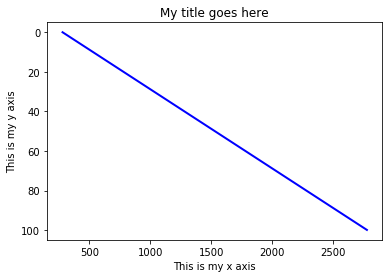

In [24]:
#Plotting our results!
#Now you should plot your results for the constant k case. You will need to fill in a title 
#and axis labels for your plot

#Copy and paste this block of code as a template for future plotting.

Title = 'My title goes here' #Insert a plot title within the single quotations.
Xlabel = 'This is my x axis' #Insert an x-axis label.
Ylabel = 'This is my y axis' #Insert a y-axis label.

#This next block of code plots this figure. The plt here is from our matplotlib import at the beginning.
plt.plot(T,y,'b-',linewidth = 2) #T and y are our x and y arrays; 'b-' sets the plotting style to be a blue solid line
plt.gca().invert_yaxis() #inverts our y axis so that 0 is at the surface
plt.title(Title) #Plots a title
plt.xlabel(Xlabel) #Plots the x-axis label
plt.ylabel(Ylabel) #Plots the y-axis label
plt.savefig("Your file name here.png") #Saves your figure! Replace the Your file name here with a file name
plt.show() #Shows our plot inline below


(b) Now run the function for the case where the upper 50 m layer has a lower thermal conductivity than the layer below. Note that for this case you will need to run the function twice for the two different thermal conductivities and then combine your temperature profiles into one plot.
   

In [20]:
#Setting new k value for upper 50 m
k_upper = 2.
y0 = 0. #Starting y
yf = 50. #Ending y

#Running function for upper 50 m
T_upper,y_upper = solve_FourierLaw1D(dy,y0,yf,T0,q,k_upper)

#Setting new k value and initial conditions for lower 50 m
k_lower = 2.5
y0 = 50. #Starting y
yf = 100. #Ending y
T0_new = T_upper[-1] #Setting our new T0 to be the deepest value from the function above

#Running function for lower 50 m
T_lower,y_lower = solve_FourierLaw1D(dy,y0,yf,T0_new,q,k_lower)

#Concatenating y and T arrays into one for plotting purposes
T = np.concatenate([T_upper,T_lower])
y = np.concatenate([y_upper,y_lower])

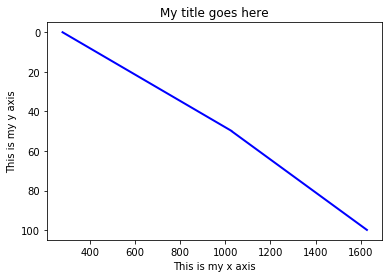

In [22]:
#Plotting our new profile with variable k:

Title = 'My title goes here' #Insert a plot title within the single quotations.
Xlabel = 'This is my x axis' #Insert an x-axis label.
Ylabel = 'This is my y axis' #Insert a y-axis label.

plt.plot(T,y,'b-',linewidth = 2)
plt.gca().invert_yaxis()
plt.title(Title)
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
plt.show()

(c) Finally, run the function for the case where the upper 50 m layer has a higher thermal conductivity than the layer below. Notice that we did not give you any code below. You will need to copy and paste relevant parts from part (b) to run and plot the results of your function. 


In [8]:
##Solve Fourier's heat transport:

In [9]:
##Plot your results

Explain in words why the three profiles have the shapes that they do. Reference Fourier's law of heat conduction and the three plots you just made in your explanation.